# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 27.1/166.8 GB disk)


# Download dataset and unzip

In [ ]:
# Download drone dataset and unzip
# Dataset
# https://drive.google.com/file/d/1LnzXzxKhmk9YjsOaaKJKUu1KPBPaxcDs/view?usp=sharing
# Replace the 2 IDs in the wget below
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt \
#   --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LnzXzxKhmk9YjsOaaKJKUu1KPBPaxcDs' -O- | \
#   sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1LnzXzxKhmk9YjsOaaKJKUu1KPBPaxcDs" -O dataset.zip && rm -rf /tmp/cookies.txt
# uavgdrone3c
# https://drive.google.com/file/d/1V66KWmuK_j90h-ddxXPDmn94tmH2f_YW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt \
  --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V66KWmuK_j90h-ddxXPDmn94tmH2f_YW' -O- | \
  sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V66KWmuK_j90h-ddxXPDmn94tmH2f_YW" -O uavgdrone.zip && rm -rf /tmp/cookies.txt
!unzip -qq uavgdrone.zip && rm uavgdrone.zip

--2023-10-30 02:49:46--  https://docs.google.com/uc?export=download&confirm=t&id=1V66KWmuK_j90h-ddxXPDmn94tmH2f_YW
Resolving docs.google.com (docs.google.com)... 74.125.130.100, 74.125.130.101, 74.125.130.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.130.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jlmb33ae8q3bvv6k5f5b2l966lid9acf/1698634125000/17610671308944230943/*/1V66KWmuK_j90h-ddxXPDmn94tmH2f_YW?e=download&uuid=04dd8123-3ede-43b6-8d27-c83d4390e4a4 [following]
--2023-10-30 02:49:47--  https://doc-08-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jlmb33ae8q3bvv6k5f5b2l966lid9acf/1698634125000/17610671308944230943/*/1V66KWmuK_j90h-ddxXPDmn94tmH2f_YW?e=download&uuid=04dd8123-3ede-43b6-8d27-c83d4390e4a4
Resolving doc-08-cc-docs.googleusercontent.com (doc-08-cc-docs.googleusercontent.com)... 74.125.130.132, 

# Set up wandb
Create an account on https://wandb.ai/home and retrieve your api key

In [ ]:
%pip install -q wandb
import wandb
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 28.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Prepare yaml config

In [ ]:
yaml_content = """
path: ../uavgdrone/uavgdrone2c+1
train: train/images
val: val/images
test:  # test images (optional)

names:
  0: Tello
  1: F450
  2: QAV
"""

# Write the YAML content to a file
with open('drone.yaml', 'w') as file:
    file.write(yaml_content)

In [ ]:
yaml_content = """
path: ../uavgdrone/uavgdrone2c
train: train/images
val: val/images
test:  # test images (optional)

names:
  0: Tello
  1: F450
"""

# Write the YAML content to a file
with open('drone2c.yaml', 'w') as file:
    file.write(yaml_content)

# Train
Documentation and configs: https://docs.ultralytics.com/usage/cfg/#train

In [ ]:
# Train YOLOv8n, add `resume model=path/to/last.pt` to resume
!yolo train model=yolov8m.pt data=drone.yaml epochs=100 batch=40 imgsz=640 \
save_period=10 cache=False

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=drone.yaml, epochs=100, patience=50, batch=40, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, in

In [ ]:
!yolo val model=runs/detect/yolov8m/weights/best.pt data=drone.yaml batch=64 imgsz=640

# Download runs contents to local
wandb has the plots and models artifacts saved too.
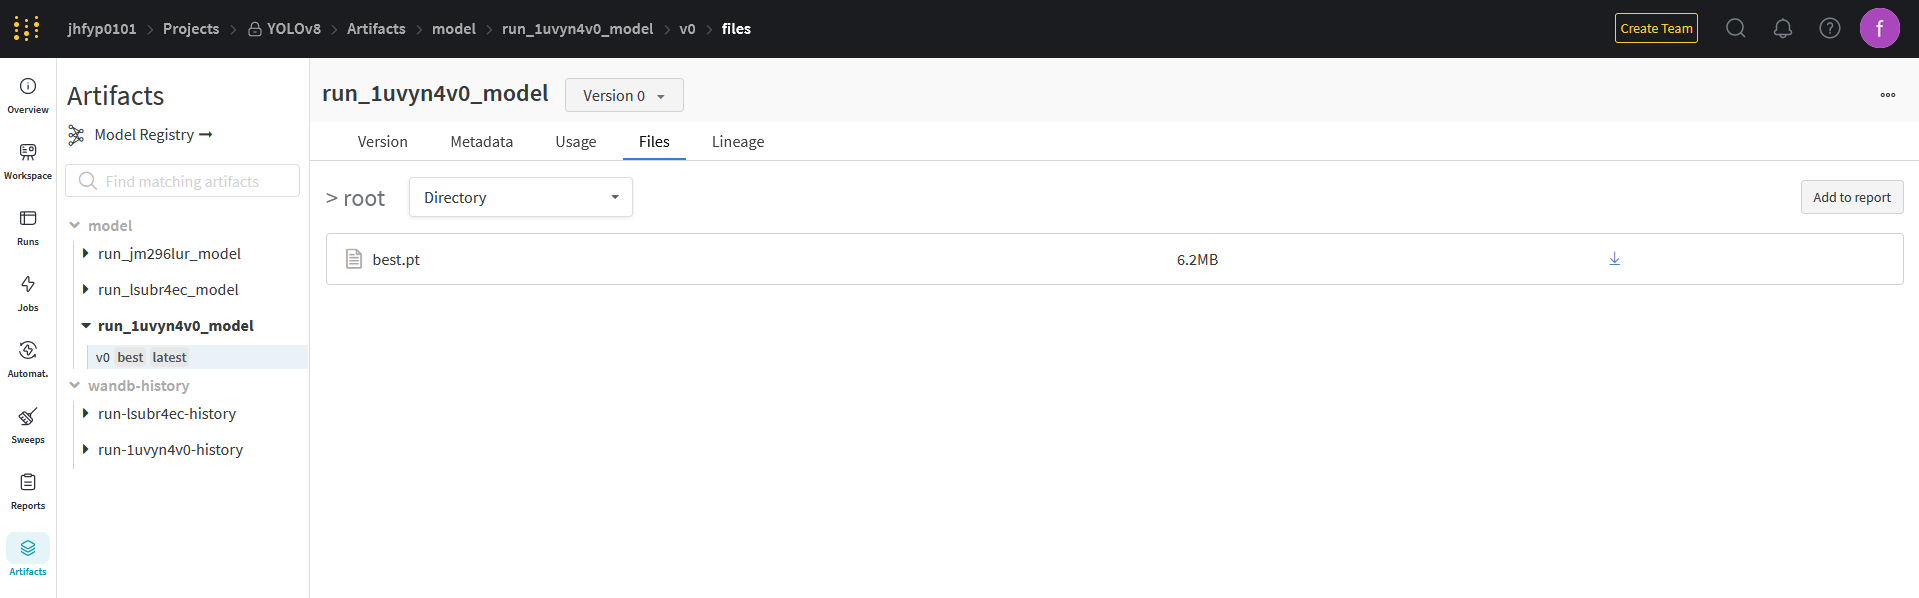

In [ ]:
!zip -r runs.zip runs
from google.colab import files
files.download('./runs.zip')

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/tune3/ (stored 0%)
  adding: runs/detect/tune3/weights/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/R_curve.png (deflated 13%)
  adding: runs/detect/train/labels_correlogram.jpg (deflated 41%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/epoch10.pt (deflated 9%)
  adding: runs/detect/train/weights/last.pt (deflated 9%)
  adding: runs/detect/train/weights/epoch70.pt (deflated 8%)
  adding: runs/detect/train/weights/best.pt (deflated 9%)
  adding: runs/detect/train/weights/epoch50.pt (deflated 9%)
  adding: runs/detect/train/weights/epoch90.pt (deflated 8%)
  adding: runs/detect/train/weights/epoch20.pt (deflated 9%)
  adding: runs/detect/train/weights/epoch30.pt (deflated 9%)
  adding: runs/detect/train/weights/epoch60.pt (deflated 8%)
  adding: runs/detect/train/weights/epoch80.pt (deflated 8%)
  adding: runs/detect/train/weig

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Hyperparam tuning
https://docs.ultralytics.com/guides/hyperparameter-tuning/

Default params at https://github.com/ultralytics/ultralytics/blob/7fd5dcbd867554063de87a1e621d2080bc1d0580/ultralytics/cfg/default.yaml#L83

In [ ]:
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO('yolov8s.pt') # Replace this to path of your model

# Tune hyperparameters on drone dataset, skipping plotting, checkpointing and validation other than on final epoch for faster Tuning.
model.tune(data='drone.yaml', batch=32, epochs=100, iterations=200, optimizer='AdamW', plots=False, save=False, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/200 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


### See results

In [ ]:
!sudo apt install tree
!tree runs
!cat runs/detect/tune/best_hyperparameters.yaml

# 4. Export to engine file

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                             | `format` Argument | Model                     | Metadata | Arguments                                           |
|--------------------------------------------------------------------|-------------------|---------------------------|----------|-----------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                    | -                 | `yolov8n.pt`              | ✅        | -                                                   |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)            | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`                                 |
| [ONNX](https://onnx.ai/)                                           | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`     |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)             | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`                                     |
| [TensorRT](https://developer.nvidia.com/tensorrt)                  | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace` |
| [CoreML](https://github.com/apple/coremltools)                     | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`                      |
| [TF SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`                                    |
| [TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`                                             |
| [TF Lite](https://www.tensorflow.org/lite)                         | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`                             |
| [TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`                                             |
| [TF.js](https://www.tensorflow.org/js)                             | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`                                             |
| [PaddlePaddle](https://github.com/PaddlePaddle)                    | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`                                             |
| [ncnn](https://github.com/Tencent/ncnn)                            | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`                                     |


In [ ]:
!yolo export model=runs/detect/train3/weights/best.pt format=engine